### Importing library's


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler  , PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
!curl -O "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60056  100 60056    0     0   122k      0 --:--:-- --:--:-- --:--:--  122k


In [3]:
with open('boston_housing_clean.pickle','rb') as f:
  df,description = pd.read_pickle(f).values()


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
x=df.drop("MEDV",axis=1)
y=df["MEDV"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=142)

In [7]:
lr=LinearRegression()
sc=StandardScaler()

### Normal Linear Regression
- without Standardizing

In [8]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.7067567524862985

- we can do this using pipelines

In [9]:
pipe=Pipeline([("Standardscaler",sc),("linearregression",lr)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7067567524862974

- Lets add cross validation to improve model accuracy.

### Cross_validation

In [10]:
kf=KFold(n_splits=5,shuffle=True,random_state=34)

In [11]:
scores=[]
for train,test in kf.split(x):
  x_train,x_test=x.iloc[train],x.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]
  x_train_sc=sc.fit_transform(x_train)
  x_test_sc=sc.transform(x_test)
  lr.fit(x_train_sc,y_train)
  y_pred=lr.predict(x_test_sc)
  scores.append(r2_score(y_test,y_pred))
scores


[0.7433039677155147,
 0.8126891411132501,
 0.705273753045728,
 0.5971486766436873,
 0.6934600897262381]

In [12]:
pipe=Pipeline([("Standardscale",sc),("linearregression",lr)])

In [13]:
cvs=cross_val_predict(pipe,x,y,cv=kf)
print(r2_score(y,cvs))
np.mean(scores)

0.718311400174394


np.float64(0.7103751256488836)

## Hyper Tuning

In [14]:
scores=[]
aplhas=np.geomspace(1e-8,10,10)
for alpha in aplhas:
  las=Lasso(alpha=alpha,max_iter=10000)
  pipe=Pipeline([("Standardscale",sc),("lasso",las)])
  pred=cross_val_predict(pipe,x,y,cv=kf)
  scores.append(r2_score(y,pred))
  #coef.append(las.fit(x,y).coef_)


In [15]:
list(zip(aplhas,scores))

[(np.float64(1e-08), 0.7183114004093183),
 (np.float64(1e-07), 0.7183114025364896),
 (np.float64(1e-06), 0.718311423597862),
 (np.float64(1e-05), 0.7183116368376441),
 (np.float64(0.0001), 0.7183137192584013),
 (np.float64(0.001), 0.7183345209986891),
 (np.float64(0.01), 0.7185383157856016),
 (np.float64(0.1), 0.714590483886482),
 (np.float64(1.0), 0.6505400791255215),
 (np.float64(10.0), -0.0015299808320212716)]

In [16]:
Lasso(alpha=1e-6).fit(x,y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [17]:
Lasso(alpha=1).fit(x,y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

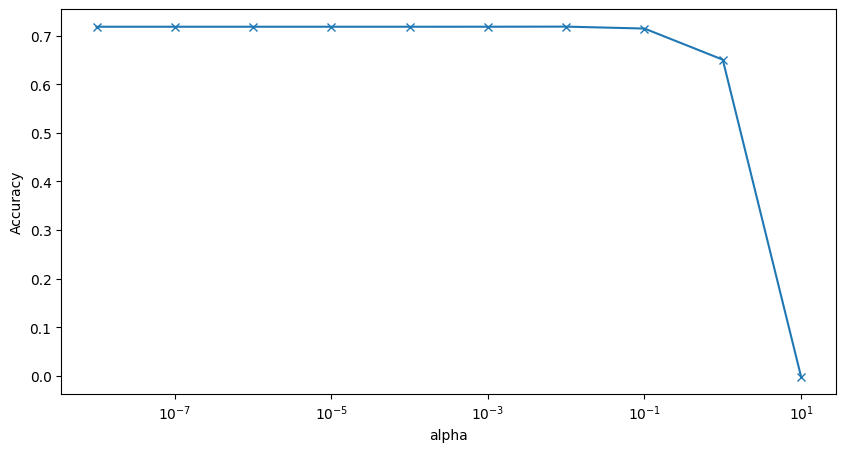

In [18]:
plt.figure(figsize=(10,5))
plt.semilogx(aplhas,scores,'-x')
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()

### Polynomial Features.

In [19]:
pf=PolynomialFeatures(degree=2)
alphas=np.geomspace(0.0001,10,10)
scores=[]
for alpha in alphas:
  las=Lasso(alpha=alpha,max_iter=10000)
  pipe=Pipeline([('scaler',sc),("pf",pf),("ridge",las)])
  pred=cross_val_predict(pipe,x,y,cv=kf)
  scores.append(r2_score(y,pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.933e+02, tolerance: 3.430e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+02, tolerance: 3.324e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.668e+02, tolerance: 3.257e

In [20]:
list(zip(alphas,scores))

[(np.float64(0.0001), 0.8286676171903685),
 (np.float64(0.00035938136638046257), 0.8301911259043604),
 (np.float64(0.001291549665014884), 0.8359696615508667),
 (np.float64(0.004641588833612782), 0.8510908707421051),
 (np.float64(0.016681005372000592), 0.8639487747382149),
 (np.float64(0.05994842503189409), 0.8439768672451466),
 (np.float64(0.21544346900318845), 0.800320169331352),
 (np.float64(0.7742636826811278), 0.7563454911471335),
 (np.float64(2.782559402207126), 0.612057047073618),
 (np.float64(10.0), 0.004561264833075063)]

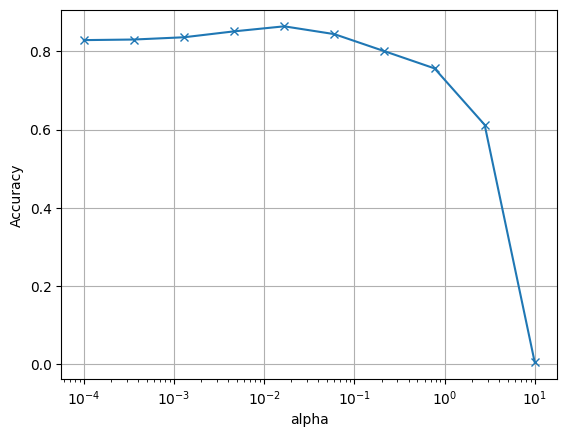

In [21]:
plt.semilogx(alphas,scores,'-x')
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [22]:
best=Pipeline([('scaler',sc),("pf",PolynomialFeatures(degree=2)),("Lasso",Lasso(alpha=0.03))])
best.fit(x,y)
best.score(x,y)

0.9134777735196521

In [23]:
best.named_steps["Lasso"].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.00309168e+00,  3.32679107e+00, -1.01840878e+00,
       -2.56161421e+00,  1.12778302e+00, -1.72266155e+00, -5.37088506e-01,
        4.39555878e-01, -3.39542586e+00,  7.22387712e-02,  0.00000000e+00,
        0.00000000e+00,  3.53653554e+00, -0.00000000e+00,  3.72285440e-01,
        0.00000000e+00,  0.00000000e+00, -5.49528703e-01, -0.00000000e+00,
       -0.00000000e+00, -4.05522485e-02,  2.25864611e-01,  1.78508858e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.50874606e-02,
       -0.00000000e+00, -2.07295802e-01, -0.00000000e+00,  3.71781995e-01,
        0.00000000e+00, -0.00000000e+00, -5.89531100e-02,  3.47180625e-01,
        0.00000000e+00,  9.23666274e-01,  3.48873365e-01,  7.29463442e-02,
        0.00000000e+00,  0.00000000e+00,  7.68485586e-02, -7.21083596e-01,
        0.00000000e+00, -5.98542558e-01,  4.18420677e-01, -7.98165728e-01,
       -7.25062683e-01,  

### Ridge
- let do with Ridge.

In [24]:
pf=PolynomialFeatures(degree=2)
scores=[]
alphas=np.geomspace(4,20,20)
for alpha in alphas:
  ridge=Ridge(alpha=alpha,max_iter=100000)
  pipe=Pipeline([("Standardscale",sc),("polynomial",pf),("ridge",ridge)])
  pred=cross_val_predict(pipe,x,y,cv=kf)
  scores.append(r2_score(y,pred))


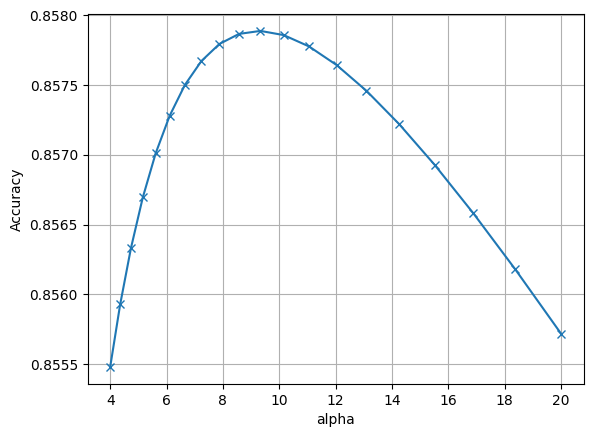

In [26]:
plt.plot(alphas,scores,'-x')
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [27]:
df_importances = pd.DataFrame(zip(best.named_steps["pf"].get_feature_names_out(),
                 best.named_steps["Lasso"].coef_,
))

In [28]:
col_names_dict = dict(zip(list(range(len(x.columns.values))), x.columns.values))

In [29]:
col_names_dict

{0: 'CRIM',
 1: 'ZN',
 2: 'INDUS',
 3: 'CHAS',
 4: 'NOX',
 5: 'RM',
 6: 'AGE',
 7: 'DIS',
 8: 'RAD',
 9: 'TAX',
 10: 'PTRATIO',
 11: 'B',
 12: 'LSTAT'}

In [30]:
df_importances.sort_values(by=1)

,0,1
13,x12,-3.395426
8,x7,-2.561614
10,x9,-1.722662
94,x8 x12,-1.124408
72,x5 x8,-1.085987
...,...,...
9,x8,1.127783
79,x6 x8,1.363407
96,x9 x10,1.962870
6,x5,3.326791


## Grid Search CV
- It finds k fold is automatically the best one.


In [31]:
from sklearn.model_selection import GridSearchCV
estimator=Pipeline([("scaler",sc),("polynomial",PolynomialFeatures()),("Ridge",Ridge())])
param={
    "polynomial__degree":[1,2,3],
    "Ridge__alpha":np.geomspace(0.001,10,10)
}
gd=GridSearchCV(estimator,param,cv=kf)
gd.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=34, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial', PolynomialFeatures()),
                                       ('Ridge', Ridge())]),
             param_grid={'Ridge__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'polynomial__degree': [1, 2, 3]})

In [35]:
gd.best_score_,gd.best_params_

(np.float64(0.8566944900457834),
 {'Ridge__alpha': np.float64(10.0), 'polynomial__degree': 2})

In [36]:
y_pred=gd.predict(x)
r2_score(y,y_pred)

0.918360471929712

In [37]:
gd.best_estimator_.named_steps["Ridge"].coef_

array([ 0.00000000e+00, -9.28892054e-02, -2.82822067e-02,  1.77609208e-01,
        1.06490437e-01, -1.10021499e+00,  3.31003905e+00, -1.10874419e+00,
       -2.22354203e+00,  1.00739100e+00, -1.11523398e+00, -6.68806719e-01,
        6.20203242e-01, -3.10178461e+00,  8.61605530e-02,  7.08935915e-02,
        8.41243011e-02,  2.19306843e+00, -5.55792372e-01,  6.45429412e-01,
        8.58821341e-02,  1.52845914e-01, -8.58456751e-01,  2.03342874e-01,
       -1.10634330e-01, -1.01500613e-01,  6.61275297e-01,  1.99286070e-01,
       -1.77219298e-01,  1.00267750e-01,  1.51831187e-01,  3.72751311e-02,
       -1.46991773e-01, -3.39958992e-01, -1.59409698e-01,  9.60959594e-01,
        1.04314809e-02,  1.00502725e-01, -3.88872614e-01,  6.54715011e-01,
        8.51319407e-02,  1.22230196e+00,  7.19661178e-01,  5.45180818e-01,
        8.83925812e-01, -1.11245040e-01,  1.08363471e-01, -4.52454113e-01,
        3.33309590e-01, -6.66915503e-01,  3.61620149e-01, -9.75597837e-01,
       -8.48442595e-01,  

- In Rige the coefficient nearly 0 but not 0 but in lasso it is 0.

In [38]:
gd.cv_results_

{'mean_fit_time': array([0.00584397, 0.01458063, 0.10128779, 0.01870427, 0.0222456 ,
        0.07271628, 0.01305804, 0.01881914, 0.15411491, 0.02168655,
        0.04392571, 0.14799705, 0.014534  , 0.03896933, 0.09410634,
        0.01692057, 0.05597563, 0.23498073, 0.01378694, 0.02045932,
        0.09903135, 0.01787152, 0.02323003, 0.1043777 , 0.01833167,
        0.01030083, 0.11252704, 0.0189095 , 0.01128306, 0.06449952]),
 'std_fit_time': array([0.00109148, 0.00597879, 0.01141075, 0.00352614, 0.00754956,
        0.01790163, 0.00528767, 0.01708937, 0.07561767, 0.00918875,
        0.02513615, 0.09053172, 0.00529553, 0.00835037, 0.02214357,
        0.01227863, 0.01220044, 0.14837799, 0.00605235, 0.01432877,
        0.03085553, 0.0093412 , 0.00833969, 0.04150265, 0.00877386,
        0.00140667, 0.05359794, 0.00451981, 0.00362889, 0.04615944]),
 'mean_score_time': array([0.00262914, 0.00924153, 0.01340132, 0.01062942, 0.00776663,
        0.007691  , 0.00833707, 0.00370755, 0.00590253, 0.01